In [1]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt
import kalepy as kale


import matplotlib.cm as cm
from holodeck import plot, utils
from holodeck.constants import YR, MSOL, GYR

# Build Semi-Analytic Model

In [11]:
dur, cad = 17.5*YR, 0.2*YR
fobs = utils.nyquist_freqs(dur,cad)
fobs_edges = utils.nyquist_freqs_edges(dur,cad)
sam = holo.sam.Semi_Analytic_Model()
# sam = holo.sam.Semi_Analytic_Model(mtot=(1.0e4*MSOL, 1.0e11*MSOL, 20), mrat=(1e-3, 1.0, 20), redz=(1e-3, 10.0, 20))  # faster version

## Test GWB calculation with default Hard_GW

14:42:28 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:42:28 INFO : Stalled SAM bins based on GMT: 2.58e+05/6.53e+05 = 3.96e-01 [sam.py:static_binary_density]
14:42:28 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
14:42:28 INFO : 	dens bef: (0.00e+00, 0.00e+00, 3.29e-61, 8.58e-04, 1.48e-02, 2.79e-02, 4.47e-02) [sam.py:static_binary_density]
14:42:44 INFO : Scatter added after 15.413242 sec [sam.py:static_binary_density]
14:42:44 INFO : 	dens aft: (6.72e-29, 2.61e-15, 3.78e-09, 1.03e-03, 1.50e-02, 2.80e-02, 4.26e-02) [sam.py:static_binary_density]
14:42:44 INFO : 	mass: 8.56e-02 ==> 8.54e-02 || change = -1.7939e-03 [sam.py:static_binary_density]
14:42:44 INFO : zeroing out 2.58e+05/6.53e+05 = 3.96e-01 systems stalled from GMT [sam.py:static_binary_density]
14:42:45 INFO : fraction of coalesced binaries: 3.79e+06/2.81e+07 = 1.35e-01 [sam.py:dynamic_binary_number]
14:42:45 INFO : stalled binaries are not being accounted for in

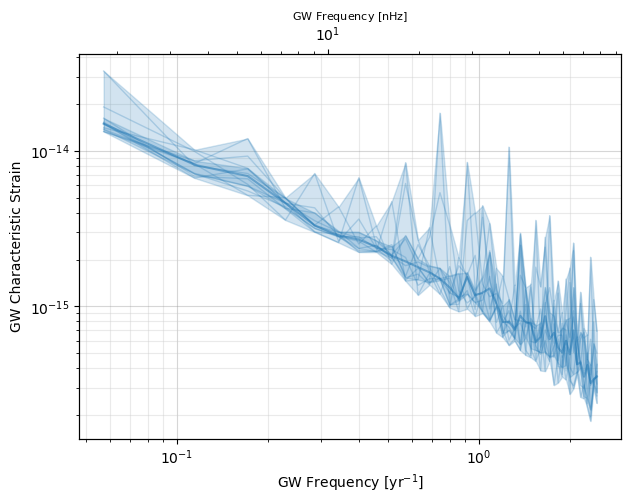

In [12]:
# just using gwb() function
gwb = sam.gwb(fobs_edges, realize=10)
fig = plot.plot_gwb(fobs, gwb)

## Test GWB calculation with Fixed_Time model

14:42:59 WARNING : class `Fixed_Time` has been deprecated!  Please use `Fixed_Time_2PL` with new parametrization! [hardening.py:__init__]
14:42:59 INFO : calculating normalization exactly [hardening.py:__init__]
14:44:19 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
14:44:21 WARNING : WARNING: _coalesced_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
14:44:33 INFO : fraction of stalled bins-xvals: 1.83e+07/2.81e+07 = 6.51e-01 [sam.py:dynamic_binary_number]
14:44:33 INFO : fraction of bins stalled at all xvals: 4.45e+05/6.53e+05 = 6.82e-01 [sam.py:dynamic_binary_number]


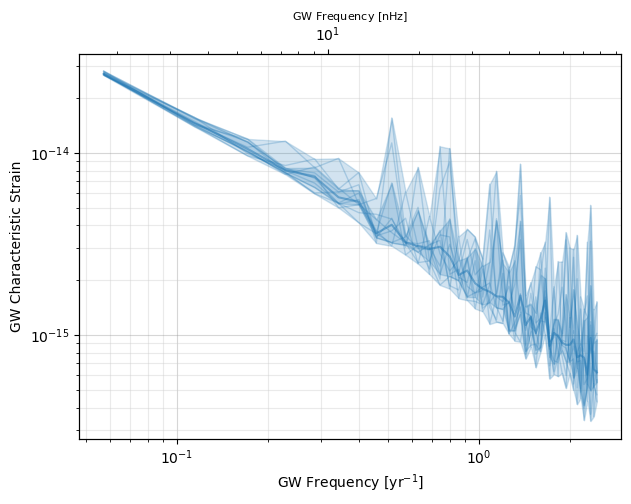

In [13]:
# just using gwb() function

gwb = sam.gwb(fobs_edges, hard=holo.hardening.Fixed_Time.from_sam(sam, 3*GYR), realize=10)
fig = plot.plot_gwb(fobs, gwb)

# Calculate SS and GWB strain with sam.ss_gwb()
This function calls single_sources.ss_gws_redz()
## using Hard_GW
### with params

In [14]:
hc_ss, hc_bg, sspar, bgpar = sam.ss_gwb(fobs_edges, hard=holo.hardening.Hard_GW, realize = 10, loudest = 5, params = True)

SS 1: 
Current memory usage: max=4.66 GB, RSS=1.05 GB, VMS=392.84 GB
14:44:43 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:44:44 INFO : fraction of coalesced binaries: 3.79e+06/2.81e+07 = 1.35e-01 [sam.py:dynamic_binary_number]
14:44:44 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=4.66 GB, RSS=1.13 GB, VMS=392.84 GB
SS 3: 
Current memory usage: max=4.66 GB, RSS=1.33 GB, VMS=393.04 GB
14:44:49 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=4.66 GB, RSS=1.87 GB, VMS=393.25 GB


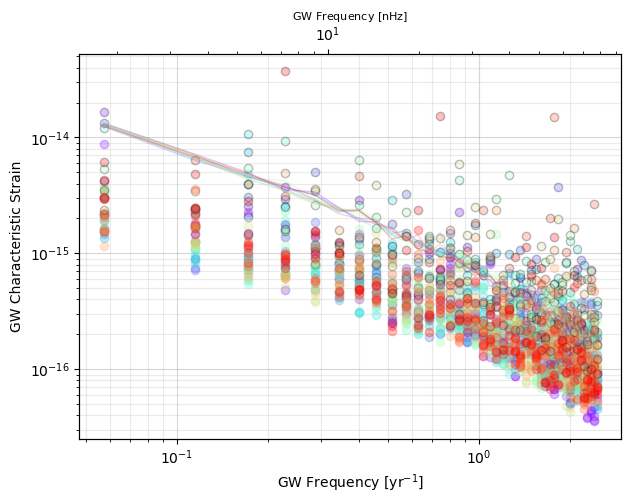

In [15]:
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)

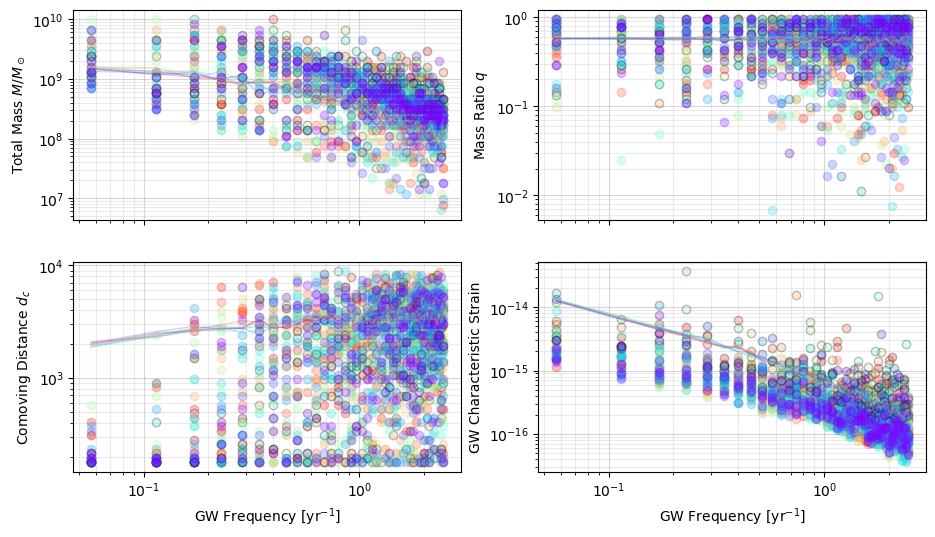

In [16]:
fig = plot.plot_pars(fobs, hc_ss, hc_bg, sspar, bgpar)

### without params

SS 1: 
Current memory usage: max=4.66 GB, RSS=1.54 GB, VMS=392.84 GB
14:45:02 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
14:45:03 INFO : fraction of coalesced binaries: 3.79e+06/2.81e+07 = 1.35e-01 [sam.py:dynamic_binary_number]
14:45:03 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=4.66 GB, RSS=1.55 GB, VMS=392.84 GB
SS 3: 
Current memory usage: max=4.66 GB, RSS=1.75 GB, VMS=393.04 GB
14:45:08 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=4.66 GB, RSS=1.96 GB, VMS=393.25 GB


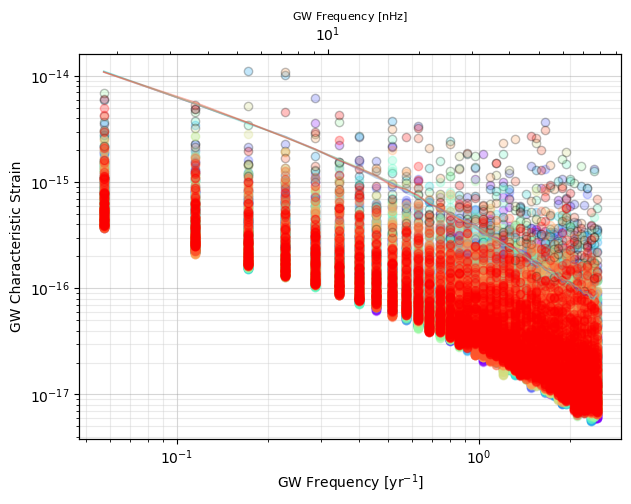

In [17]:
hc_ss, hc_bg = sam.ss_gwb(fobs_edges, realize=30, loudest=100, params=False)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)

## using Fixed_Time
### with params

14:45:40 WARNING : class `Fixed_Time` has been deprecated!  Please use `Fixed_Time_2PL` with new parametrization! [hardening.py:__init__]
14:45:40 INFO : calculating normalization exactly [hardening.py:__init__]
SS 1: 
Current memory usage: max=4.66 GB, RSS=1.63 GB, VMS=392.85 GB
14:47:04 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
14:47:05 WARNING : WARNING: _coalesced_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
14:47:16 INFO : fraction of stalled bins-xvals: 1.83e+07/2.81e+07 = 6.51e-01 [sam.py:dynamic_binary_number]
14:47:16 INFO : fraction of bins stalled at all xvals: 4.45e+05/6.53e+05 = 6.82e-01 [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=4.89 GB, RSS=0.69 GB, VMS=392.85 GB
SS 3: 
Current memory usage: max=4.89 GB, RSS=0.89 GB, VMS=393.05 GB
SS 4: 
Current memory usage: max=4.89 GB, RSS=1.19 GB, VMS=393.05 GB


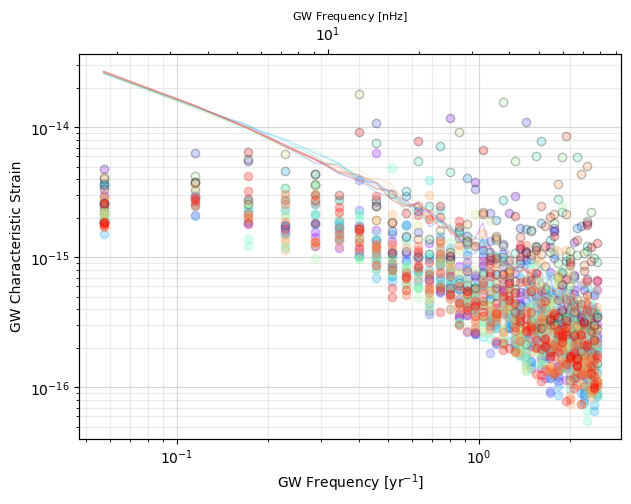

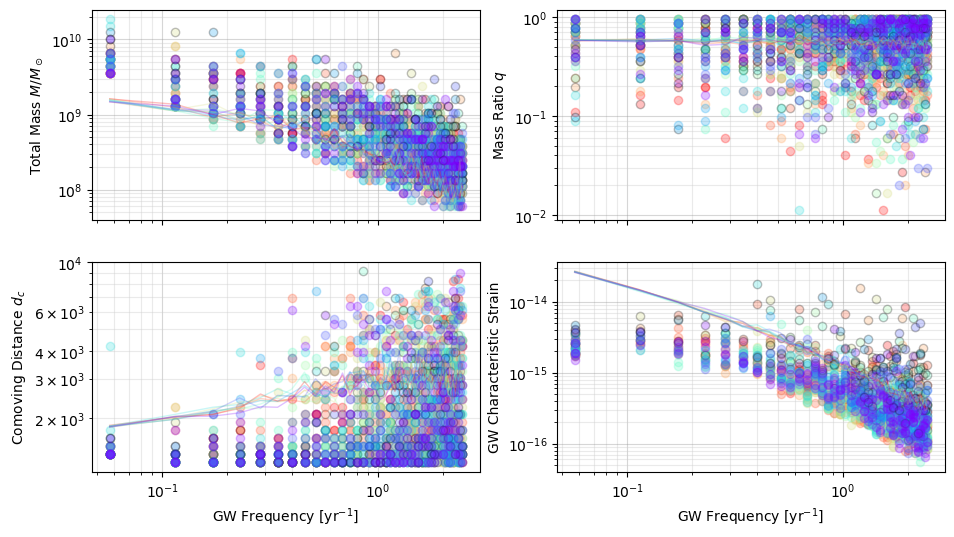

In [18]:
hard = holo.hardening.Fixed_Time.from_sam(sam, 3*GYR)
hc_ss, hc_bg, sspar, bgpar = sam.ss_gwb(fobs_edges, hard=hard, realize = 10, loudest = 5, params = True)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)
fig = plot.plot_pars(fobs, hc_ss, hc_bg, sspar, bgpar )

### without params

SS 1: 
Current memory usage: max=4.89 GB, RSS=1.17 GB, VMS=392.86 GB
14:47:32 INFO : zero_coalesced=False, zero_stalled=True [sam.py:dynamic_binary_number]
14:47:33 WARNING : WARNING: _coalesced_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
14:47:44 INFO : fraction of stalled bins-xvals: 1.83e+07/2.81e+07 = 6.51e-01 [sam.py:dynamic_binary_number]
14:47:44 INFO : fraction of bins stalled at all xvals: 4.45e+05/6.53e+05 = 6.82e-01 [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=5.12 GB, RSS=0.69 GB, VMS=392.86 GB
SS 3: 
Current memory usage: max=5.12 GB, RSS=0.89 GB, VMS=393.06 GB
SS 4: 
Current memory usage: max=5.12 GB, RSS=1.19 GB, VMS=393.06 GB


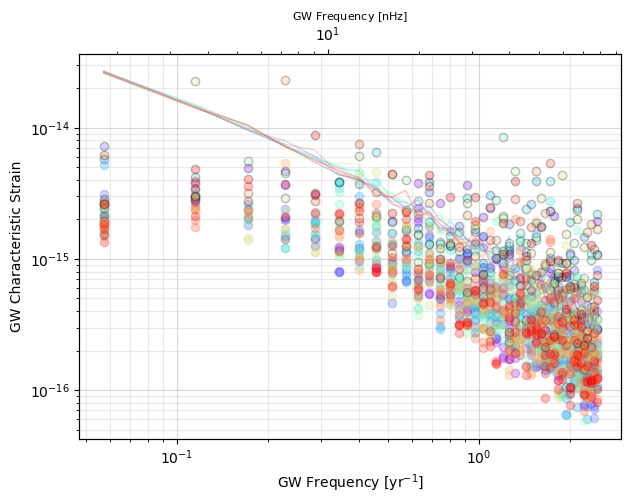

In [19]:
hc_ss, hc_bg = sam.ss_gwb(fobs_edges, hard=hard, realize = 10, loudest = 5, params = False)
fig = plot.plot_bg_ss(fobs, hc_bg, hc_ss)